In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from graph import graph
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import HumanMessage


In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
        
_set_env("LANGCHAIN_TRACING_V2")
_set_env("LANGCHAIN_ENDPOINT")
_set_env("LANGCHAIN_API_KEY")   
_set_env("LANGCHAIN_PROJECT")
_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")   

In [7]:
import uuid


thread_id = uuid.uuid4()
output = await graph.ainvoke({"messages": [("system", "Introduce yourself to the use and introduce the place you're touring them around  ")]}, config={"configurable": {"thread_id": thread_id}})


for m in output['messages'][-1:]:
        m.pretty_print()

[autoreload of state failed: Traceback (most recent call last):
  File "/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tom/Repositories/tour-guide/backend/tour_guide_bot/.venv/lib/python3.11/site-packages/IPython/exten

ValueError: Item with item_id  not found

In [10]:
node_to_stream = "call_model"
config = {"configurable": {"thread_id": thread_id}}
input_message = HumanMessage(content="search about the history for me!")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    # Get chat model tokens from a particular node 
    if event["event"] == "on_chat_model_stream" and event['metadata'].get('langgraph_node','') == node_to_stream:
        data = event["data"]
        print(data["chunk"].content, end="|")

2024-10-16 16:04:41,817 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    Also, speak in old english.\n    ", 

|||||||||

2024-10-16 16:04:45,877 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    Also, speak in old english.\n    ", 

search


2024-10-16 16:04:46,450 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


|London|,| the| noble| capital| city| of| England|,| hath| a| rich| and| stor|ied| past|.| From| its| Roman| beginnings| to| its| present| day| grandeur|,| the| city's| history| is| woven| with| tales| of| con|quests|,| revol|utions|,| and| cultural| awaken|ings|.| Pray|,| what| specific| inquiries| dost| thou|

2024-10-16 16:04:48,568 - INFO - content="London, the noble capital city of England, hath a rich and storied past. From its Roman beginnings to its present day grandeur, the city's history is woven with tales of conquests, revolutions, and cultural awakenings. Pray, what specific inquiries dost thou have regarding the history of London?" additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e2bde53e6e'} id='run-d838874b-7058-4ea6-8e68-70f1b6dbd25e'


 have| regarding| the| history| of| London|?||

In [6]:
from IPython.core.display import display, HTML

# Set maximum width for output cells

display(HTML("<style>.output_wrapper, .output { max-width: 1600px; }</style>"))

/var/folders/25/0lj6pt611h719lz78v714q_m0000gn/T/ipykernel_6008/1409042138.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


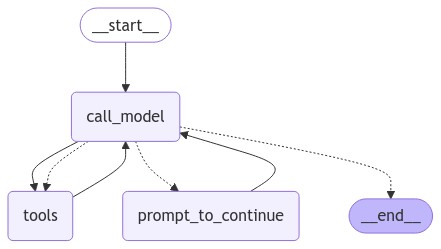

In [6]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
